In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [64]:
toyota = pd.read_csv("ToyotaCorolla.csv", encoding = 'latin')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


#### choosing only important features based on the prior knowledge related to the dataset and the problem statement

In [65]:
toyota = toyota[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears','Quarterly_Tax', 'Weight']]
toyota = toyota.rename({'Age_08_04':'age','Quarterly_Tax':'QT'},axis=1)
toyota.head()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [66]:
# checking for null values
toyota.isnull().sum()

Price     0
age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [67]:
toyota[toyota.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [68]:
toyota=toyota.drop_duplicates().reset_index(drop=True)  
toyota.head()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [69]:
toyota.shape 

(1435, 9)

In [70]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   cc      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [71]:
toyota.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1435.0,10720.915679,3608.732978,4350.0,8450.0,9900.0,11950.0,32500.0
age,1435.0,55.980488,18.563312,1.0,44.0,61.0,70.0,80.0
KM,1435.0,68571.782578,37491.094553,1.0,43000.0,63451.0,87041.5,243000.0
HP,1435.0,101.491986,14.981408,69.0,90.0,110.0,110.0,192.0
cc,1435.0,1576.560976,424.387533,1300.0,1400.0,1600.0,1600.0,16000.0
Doors,1435.0,4.032753,0.952667,2.0,3.0,4.0,5.0,5.0
Gears,1435.0,5.026481,0.188575,3.0,5.0,5.0,5.0,6.0
QT,1435.0,87.020209,40.959588,19.0,69.0,85.0,85.0,283.0
Weight,1435.0,1072.287108,52.251882,1000.0,1040.0,1070.0,1085.0,1615.0


In [72]:
# finding correlation
correlation = toyota.corr()
correlation

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

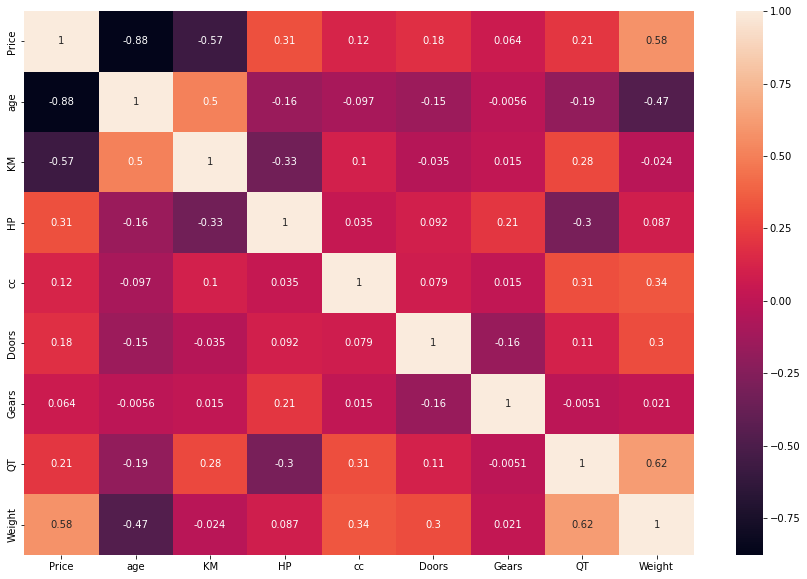

In [73]:
#heatmap of correlation
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot= True)

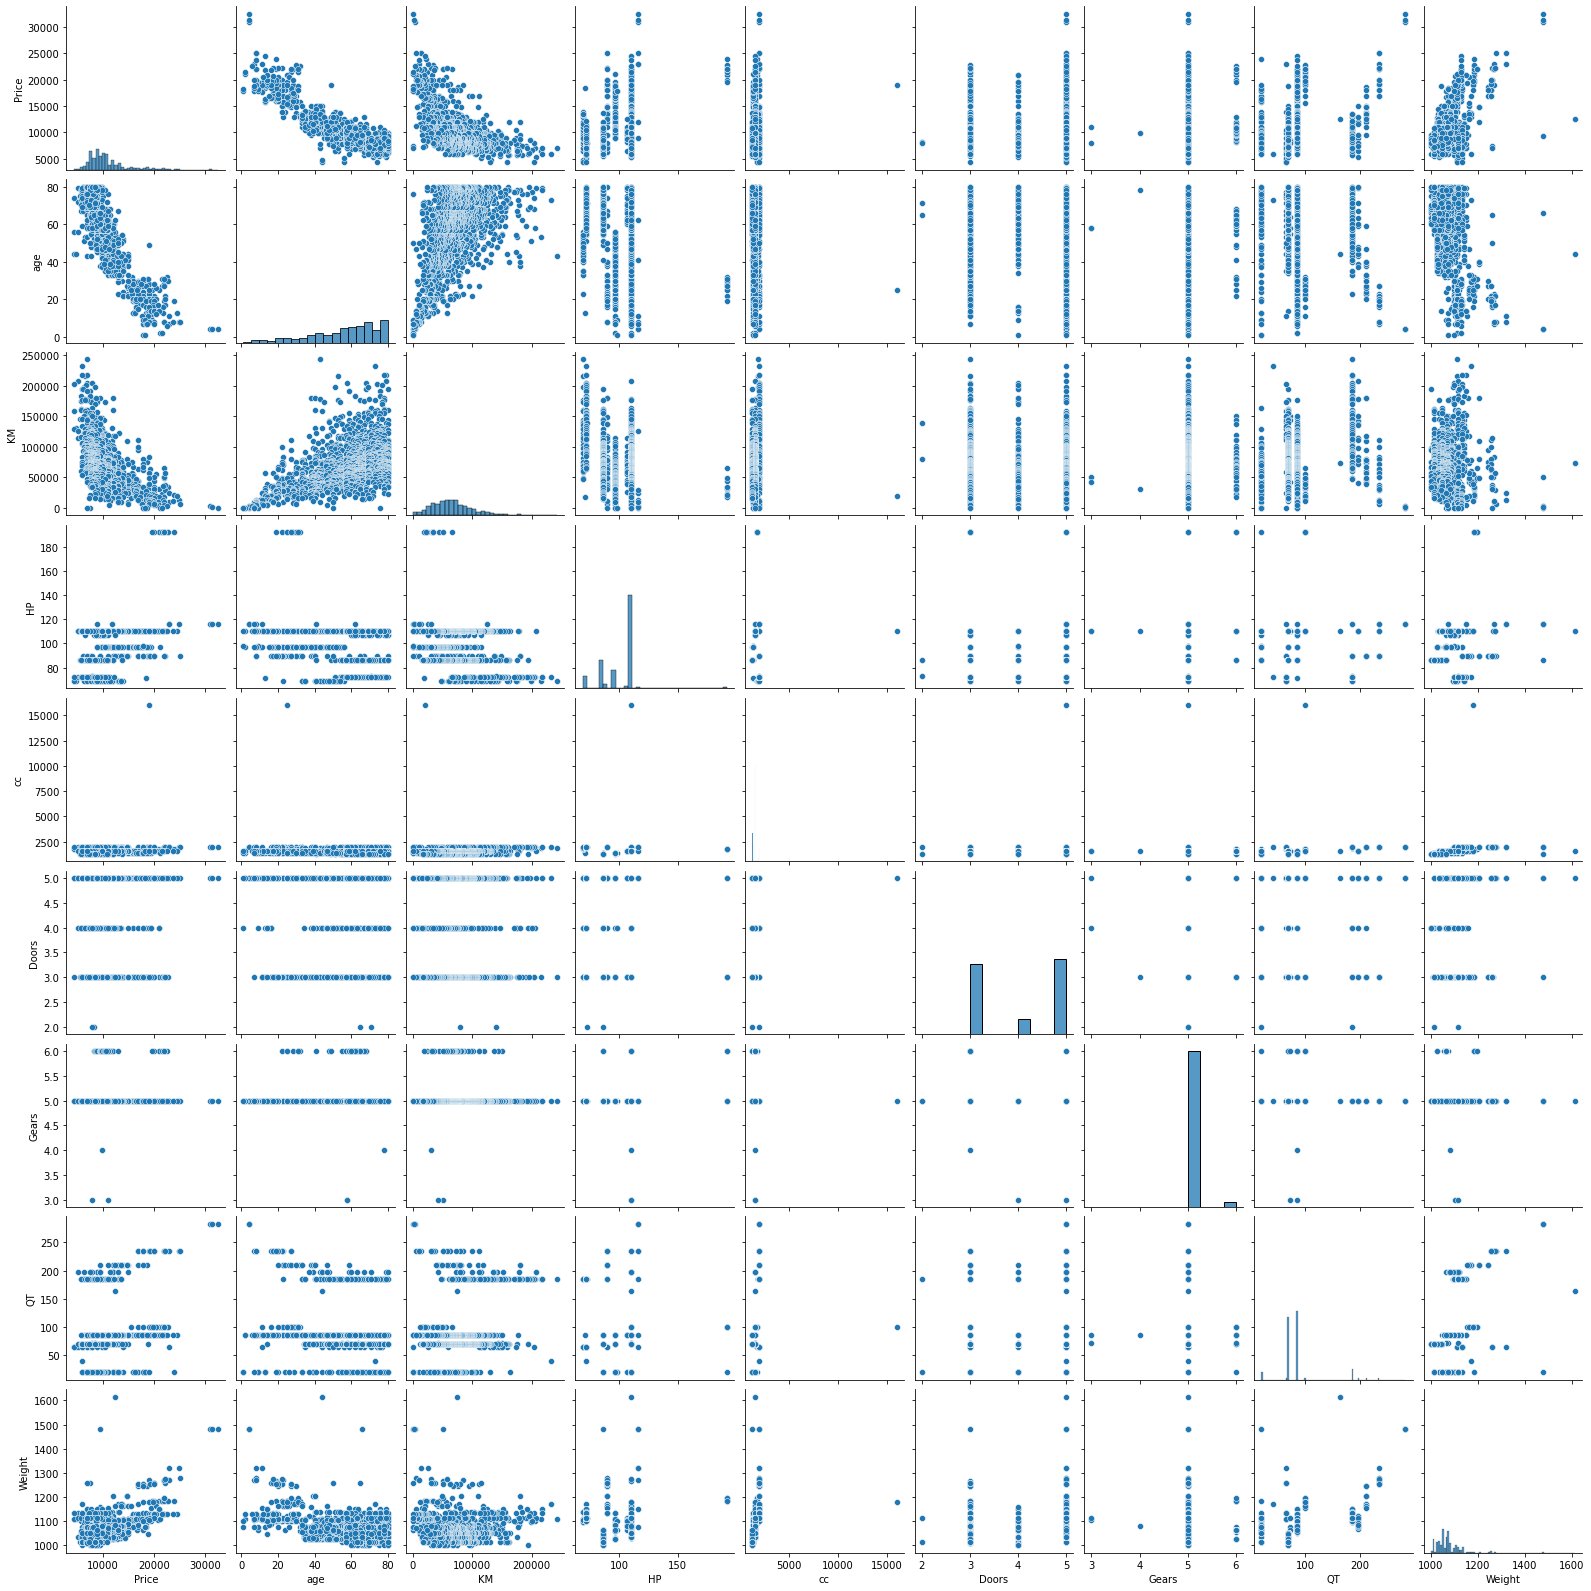

In [74]:
# pairplot
sns.pairplot(toyota)

In [75]:
# modelling

In [76]:
model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:04:26   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
# finding parameters
model.params

Intercept   -5472.540368
age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [78]:
np.round(model.pvalues,4) 

Intercept    0.0001
age          0.0000
KM           0.0000
HP           0.0000
cc           0.1882
Doors        0.9816
Gears        0.0025
QT           0.0033
Weight       0.0000
dtype: float64

In [79]:
# cc and Doors are insignficant as pvalue > 0.05

In [80]:
# cross checking whether 'cc' and 'Doors' are individually insignficant or not 

In [81]:
model_cc=smf.ols('Price~cc',data=toyota).fit() 
np.round(model_cc.pvalues ,4) 
# cc is signficant variable individually

Intercept    0.0
cc           0.0
dtype: float64

In [82]:
model_Doors=smf.ols('Price~Doors',data=toyota).fit()
np.round(model_Doors.pvalues,4)
# Doors is also a signficant variable individually

Intercept    0.0
Doors        0.0
dtype: float64

In [83]:
# trying to check whether both combined signficant or not
model_cc_Doors=smf.ols('Price~cc+Doors',data=toyota).fit()
np.round(model_cc_Doors.pvalues,4)
# both variables are  signficant when combined

Intercept    0.0
cc           0.0
Doors        0.0
dtype: float64

In [84]:
# checking for colinearity using vif calculation :
# checking for colinearity using vif 
# VIF = 1 → No correlation
# VIF = 1 to 5 → Moderate correlation
# VIF >10 → High correlation

In [85]:
# calculating VIF

rsq_age=smf.ols('age~KM+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~age+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~age+KM+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_HP=1/(1-rsq_HP) 

rsq_CC=smf.ols('cc~age+KM+HP+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~age+KM+HP+cc+Gears+QT+Weight',data=toyota).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~age+KM+HP+cc+Doors+QT+Weight',data=toyota).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~age+KM+HP+cc+Doors+Gears+Weight',data=toyota).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~age+KM+HP+cc+Doors+Gears+QT',data = toyota).fit().rsquared
vif_WT=1/(1-rsq_WT)

In [86]:
# putting the values in dataframe
vif_frame=pd.DataFrame({'Variables':['age','KM','HP','cc','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]})
vif_frame
# no significant colinearity detected

,Variables,VIF
0,age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


# residual analysis : 

In [87]:
# ( Q - Q plot )

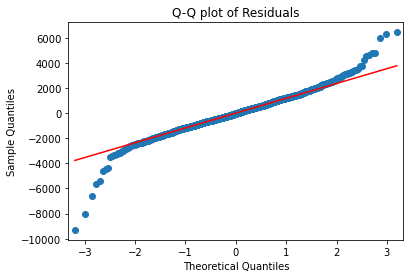

In [88]:
qq_plot=sm.qqplot(model.resid,line='q')
plt.title ("Q-Q plot of Residuals")
plt.show()

In [89]:
# outliers detected from the graph

In [90]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [91]:
list(np.where(model.resid< -6000))

[array([220, 600, 959], dtype=int64)]

In [92]:
# checking for homoscedasticity

In [93]:
def get_standardized_values(vals) :
    return(vals-vals.mean())/vals.std()  # changing into z score or standardizing

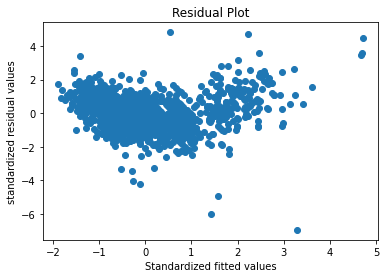

In [94]:
#residual plot
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [95]:
# apply cooks distance method

In [96]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance 
c 


array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

In [97]:
# creating stem plot using these influencers

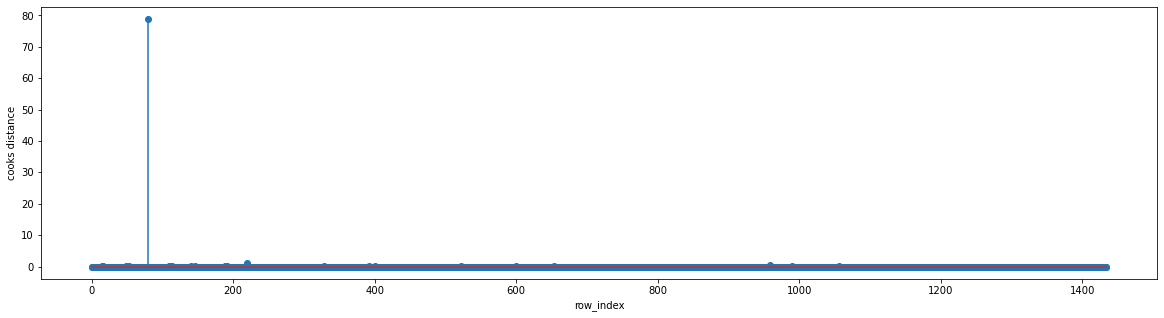

In [98]:
fig=plt.subplots(figsize=(20,5))
plt.stem(np.arange(len(toyota)),np.round(c,4))
plt.xlabel('row_index')
plt.ylabel('cooks distance')
plt.show() 

In [99]:
# finding max value
np.argmax(c),np.max(c) 

(80, 78.7295058224984)

In [100]:
# removing the 80th observation because it is very faraway from remining datapoints

In [101]:
toyota[toyota.index.isin([80])] 

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [108]:
new_toyota =toyota.drop(toyota.index[[80]],axis=0).reset_index(drop=True)
new_toyota

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [103]:
new_toyota.shape

(1434, 9)

In [104]:
# modelling 
new_model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+QT+Weight',data=new_toyota).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:04:27   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
cc            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
QT             8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
# prediction on newdata

In [106]:
newdata=pd.DataFrame({'age':10,'KM':20000,'HP':150,'cc':400,'Doors':4,'Gears':4,'QT':140,'Weight':100},index=[0])
newdata

,age,KM,HP,cc,Doors,Gears,QT,Weight
0,10,20000,150,400,4,4,140,100


In [107]:
pred_price = new_model.predict(newdata)
pred_price

0    2381.704488
dtype: float64